# 1. Exploratory Data Analysis


In [1]:
# Import libraries

# Utilities
import pandas as pd
pd.options.display.max_colwidth = 300
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# load the data
df = pd.read_csv("IceCreamData.csv")

In [3]:
# Viewing the top 5 rows
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
# Display shape of data frame
df.shape

(500, 2)

In [5]:
# Display correlation of data frame
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


# 2. Data Cleaning/Preparation

In [6]:
# View sum of NA and drop those with majority NaN values
df.isna().sum().sort_values()

Temperature    0
Revenue        0
dtype: int64

In [7]:
# Drop duplicates

print(df.drop_duplicates())
print(df.shape)

     Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]
(500, 2)


In [9]:
# Divide the independent and dependent variable into two separate variables.

X = df.iloc[:,0].values.reshape(-1,1)
Y = df.iloc[:,1].values

# 3. Model Training

In [10]:
# Assigning Training & Test Variable
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

# Define and Initiate the model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
regressor.coef_

array([21.38197386])

In [12]:
regressor.intercept_

46.80464127742357

# 4. Model Visualization

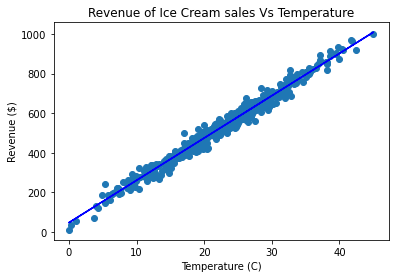

In [13]:
# y=mx+c (Linear regression model)
line = regressor.intercept_ + regressor.coef_*X

# Scatter Plot for actual data
plt.scatter(X,Y)
plt.plot(X,line, 'b')
plt.ylabel("Revenue ($)")
plt.xlabel("Temperature (C)")
plt.title("Revenue of Ice Cream sales Vs Temperature")
plt.show()

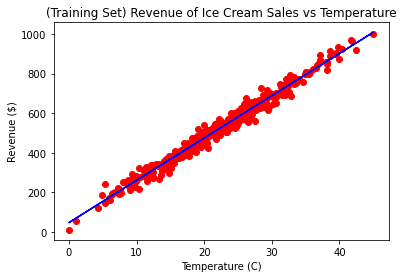

In [14]:
# Visualise the training set
plt.scatter(X_train,y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue' )
plt.title('(Training Set) Revenue of Ice Cream Sales vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Revenue ($)')
plt.show()


# 5. Model Testing

In [15]:
# Kept aside some data to test - X_test
y_pred = regressor.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [16]:
compare_df

,Desired Output (Actuals),Predicted Output
0,659.873287,681.938706
1,623.248701,632.144750
2,559.135869,559.643605
3,497.752318,498.906100
4,627.901841,615.459392
...,...,...
95,564.310532,580.508238
96,643.944327,640.806556
97,653.986736,662.393839
98,412.082357,413.137624


# 6. Model Evaluation

In [17]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The mean absolute error
print('Mean absolute error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', r2_score(y_test, y_pred)*100, '%')

Coefficients: 
 [21.38197386]
Mean absolute error: 19.18454740837043
Mean Squared Error: 652.520061297973
Root Mean Squared Error: 25.5444722258647
R2 Score:  97.71532792713992 %


# 7. Creating input to test model

In [ ]:
# Own Prediction 

def action():
    loop = True
    while loop:
        print("1. Predict your sales using temperature")
        print("2. Exit the Programe")
        choice = int(input("Choose Option "))

        if choice == 1:
                            
            myvalue = int(input("Key in your testing temperature: "))
            own_pred = (regressor.predict([[myvalue]]))
            print("My estimated sales is = $", round(own_pred[0],2),"\n")

        elif choice == 2:
            print("Exiting programme, bye bye!")
            break
                     
        else:
            print("Wrong input, please try again")   

action()

#### Conclusion

According to the results, the mean absolute error is 19.1 in USD, suggesting that there is little variance between the test and prediction dataset, while the R-squared score remains high at 97.7%.

This proves that there is a linear relationship between the increase in ice cream sales and the overral ambient temperature.